## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [197]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [198]:
#Pandas used to read the set 

df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [199]:
#getting The number of rows in the dataset using(len) function

b= len(df)

print('The number of rows in the dataset =',b)


The number of rows in the dataset = 294478


c. The number of unique users in the dataset.

In [200]:
#getting The number of unique users in the dataset using(nunique) function


c=df['user_id'].nunique()
print('The number of unique users in the dataset =',c)


The number of unique users in the dataset = 290584


In [201]:
#in this step i tried to make a filter in orer to get the mean of the converted column later so i filtered by "1" as a value
converted = df[df["converted"] == 1]
converted.head()


,user_id,timestamp,group,landing_page,converted
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
15,644214,2017-01-22 02:05:21.719434,control,old_page,1


d. The proportion of users converted.

In [202]:
#in this step i make a divition with the len funtion in order to get the proportion of users converted

converted_prportion=len(converted)/len(df)
print('The proportion of users converted =',converted_prportion)

The proportion of users converted = 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [203]:
#In this step i am trying to get the number of times the new_page and treatment don't match in the set 

newpage_n_treat = len(df[(df['landing_page']=='new_page') & (df['group'] !='treatment')])

print("The number of times the new_page and treatment don't match =",newpage_n_treat)

The number of times the new_page and treatment don't match = 1928


f. Do any of the rows have missing values?

In [204]:
#with this is step i am trying to make sure there are no null or missing values
df_missing=df.isnull().sum()
df_missing

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [205]:
# figuring out the The number of times the old_page and control don't match using len function 
oldpage_n_control = len(df[(df['landing_page']=='old_page') & (df['group']!='control')])
oldpage_n_control
print("The number of times the old_page and control don't match =",oldpage_n_control)

The number of times the old_page and control don't match = 1965


In [206]:
#in this step i removed 
# the cells with these conditions 'The number of times the old_page and control don't match' or and 'the number of times the new_page and treatment don't match'
#to make sure i have the right dataframe2 'df2'

removing_step_1 =((df[(df['landing_page']=='new_page') & (df['group'] !='treatment')]) | (df[(df['landing_page']=='old_page') & (df['group']!='control')])).index
df2=df.drop(removing_step_1)
#removing_step_1.drop()
del removing_step_1


In [207]:
#this step means that the removing step has been working in the prvious cell 
df2_test = df[((df.group == 'treatment') & (df.landing_page == 'new_page')) | ((df.group == 'control') & (df.landing_page == 'old_page'))]
df2_test.shape[0]

#since the rows where treatment does not match with new_page or control does not match with old_page are now deleting
#since by searching for the new set df2 for the rows with the condition-->
#(the rows where treatment does not match with new_page or control does not match with old_page) and answer is zero
#so the rows with the mentioned conditioned are not part of df2 and the remaining rows is 290585 cell doesnot not include 
#any rows with the previous condition and the whole df2 set has only one duplicate which in the upcoming cell you will found 
#the set will be only 290584 

#so issue has be modified 





290585

In [208]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [209]:

### by this step we see that that the previous deleting step has worked
### this is not my syntax its udacity syntax wrritten before i apply any thing 

# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

In [210]:
#this is extra step to make sure that nothing from the wrong rows passed to df2 

removing_step_2 =((df2[(df2['landing_page']=='new_page') & (df2['group'] !='treatment')]) | (df2[(df2['landing_page']=='old_page') & (df2['group']!='control')])).index
removing_step_2.shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [211]:
#in this step trying to make sure that the user id values unique preparing to delet any duplicates

a=df2['user_id'].nunique()
print("unique user ids =",a)

unique user ids = 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [212]:
#finding duplicates
df2['user_id'].duplicated().any()


True

c. What is the row information for the repeat **user_id**? 

In [213]:
#with this step i found the duplicated value in the set 
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [214]:
#with this step trying to delete the duplicate 
df2 = df2.drop_duplicates(subset=['user_id'], keep='first')

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [215]:
#calculating the probability of an individual converting regardless of the page using same method i used perviously in 'd' part 1
conv = df2[df2["converted"] == 1]
aa=len(conv)/len(df2)
print("probability of an individual converting regardless of the page they receive =",aa)

probability of an individual converting regardless of the page they receive = 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [216]:
#calcuting the probability converted in the control

bb=len(df2[(df2['group']=='control') &(df2['converted'] == 1)])/(len(df2[df2['group']=='control']))
print("The probability converted in the control group =",bb)

The probability converted in the control group = 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [217]:
#calcuting the probability converted in the treatment

cc=len(df2[(df2['group']=='treatment') &(df2['converted'] == 1)])/(len(df2[df2['group']=='treatment']))
print("The probability converted in the treatment group =",cc)

The probability converted in the treatment group = 0.11880806551510564


d. What is the probability that an individual received the new page?

In [218]:
#calcuting the probability that an individual received the new page                                       
dd=(len(df2[df2['landing_page']=='new_page']))/df2.shape[0]
print("The probability that an individual received the new page =",dd)

The probability that an individual received the new page = 0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**
Answer
a) convertion rate : control group is higer by a small amout than treatment group

b) this small amout of difference can't make it clear deision that the old page is better 


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
$$ H_0 :  p_new =<𝑝𝑜𝑙𝑑 $$
$$ H_1 :  p_new >pold $$


-------------------------
$$ H_0 :  P_new - P_old <= 0 $$
$$ H_1 : P_new - P_old > 0 $$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>


Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [219]:
# calc the pnew under null using mean function

p_new =df2['converted'].mean()

print("The conversion rate for  𝑝𝑛𝑒𝑤  under the null =",p_new)

The conversion rate for  𝑝𝑛𝑒𝑤  under the null = 0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [220]:
## calc the pold under null using mean function

p_old=df2['converted'].mean()

print("The conversion rate for  𝑝𝑜𝑙𝑑  under the null =",p_old)

The conversion rate for  𝑝𝑜𝑙𝑑  under the null = 0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [221]:
# calc the number of individuals in the treatment as n_new

n_new=df2[df2['group']=='treatment'].shape[0]
print("The number of individuals in the treatment group =",n_new)

The number of individuals in the treatment group = 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [222]:
#the number of individuals in the control as n_old

n_old=df2[df2['group']=='control'].shape[0]
print("The number of individuals in the control group =",n_old)

The number of individuals in the control group = 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [223]:
#using numpy to apply the binomial distribution

new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [224]:
#using numpy to apply the binomial distribution

old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [225]:
#using the mean funtion to calc both simulated values for p_old and p_new
simulated_p_old=old_page_converted.mean()
simulated_p_new=new_page_converted.mean() 
obs_diff=new_page_converted.mean() - old_page_converted.mean()
print ('simulated_p_old =',simulated_p_old,'simulated_p_new =',simulated_p_new,'obs_diff=',obs_diff)


simulated_p_old = 0.118479562757 simulated_p_new = 0.120968962907 obs_diff= 0.00248940014962


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [226]:
#using the binomial disrubtion in order to get the p_diffs
new_simulation = np.random.binomial(145310, 0.11959, 10000)/145310
old_simulation = np.random.binomial(145274, 0.11959, 10000)/145274
p_diffs = new_simulation - old_simulation
print(p_diffs)

[-0.00114453  0.00149141 -0.00128891 ..., -0.00130986 -0.00073171
  0.00053491]


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

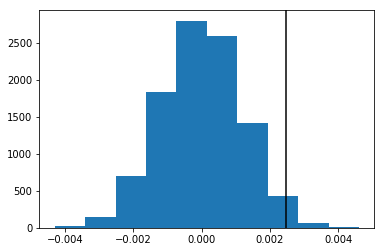

In [227]:
#plot to represent the set 
plt.hist(p_diffs);
# as the obs_diff is bassed on the the numpy random the line place changes by repeating the running of the previous cells 
plt.axvline(obs_diff,color='black');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

p_val = 0.9071


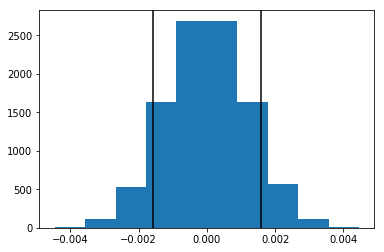

In [178]:
#calculate the diffrence between treatment and control group in the data set  and observing statisticlly
#if the null hypothesis is true 

observed_diff = cc - bb
prob_more_extreme_low = (p_diffs > observed_diff).mean()
plt.hist(p_diffs);
lower_bound=plt.axvline(observed_diff, color='black');
upper_bound=plt.axvline(p_diffs.mean() + (p_diffs.mean() - observed_diff), color='black');
p_val = prob_more_extreme_low
print('p_val =',p_val)


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
Answer:
Part J was the way to test  probability of null hypothesis is true, and by focusing on the p-value to figure out if the preformance of the old page is better or the new page 

I  found that the p-value equals to .904 which is higher than .05 which is repsenting the alpha value in this case, so i can't  reject the null hypothesis, and have a clear a decision that the old page's performance is better than or the same as the new page's performance.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [179]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page'")['converted'].sum()
convert_new = df2.query("landing_page == 'new_page'")['converted'].sum()
n_old =  df2.query("landing_page == 'old_page'").shape[0]
n_new =  df2.query("landing_page == 'new_page'").shape[0]
print('The number of converted users using old page =',convert_old,
      'The number of converted users using new page =',convert_new,
      'The number of rows in the old page  =',n_old,
      'The number of rows in the new page =',n_new)

The number of converted users using old page = 17489 The number of converted users using new page = 17264 The number of rows in the old page  = 145274 The number of rows in the new page = 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [180]:
#z_score to measure the sucess and the p_value pramter is for the numbr of trials 
z_score,p_value = sm.stats.proportions_ztest([17489, 17264], [145274, 145310], alternative = 'smaller')
print('p_value =',p_value,'z_score =',z_score)

p_value = 0.905058312759 z_score = 1.31092419842


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
in this situation here we see that the z-score is less than the critical value, which means we can't reject the null hypothesis and make a decision that the old page's converted rate is better than or equal to the new page's converted rate

In [181]:
from scipy.stats import norm

print(norm.cdf(z_score))

print(norm.ppf(1-0.05))
 # error rate equal to 5%
# the answer is yes 

0.905058312759
1.64485362695


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
The Answer: logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [182]:
#creating the intercept column and make dummy valriable column
from scipy.stats import norm
import statsmodels.api as sm

df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df['landing_page'])['new_page']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [183]:
#create the logistic regression model
from scipy import stats

stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)

logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [184]:
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [185]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        16:32:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [186]:
np.exp(results.params)


intercept    0.136863
ab_page      0.985123
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**
P-Value = 0.19 
its different than part 2, description below 
$$ H <| em>0 () : p<em> new = p<em> old $$
$$ H <| em>1 () : p<em> new != p<em> old $$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
I believe the more factors taken in consideration the more effective results , whenever a client visits the website he is intersted to buy somthing factors only helps in completing the purches or not and that may based on the product, price or even offers 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

Does it appear that country had an impact on conversion?
Answer 
I believe that people in both US and CA has a bit more convertion rate that in Uk so, the country is a factor but not the most important one because its slightly near to each other  

In [187]:
#reading countries data set and checking its unique values
df_ctry = pd.read_csv('countries.csv')
df_ctry.shape[0]
df_ctry['country'].nunique()
#merging both sets countries and ab_test under one set called df_both
df_both = df2.join(df_ctry.set_index('user_id'),on ='user_id')
#creating dummies
df_both[['CA','UK','US']] = pd.get_dummies(df_both['country'])
df_both.head()
#creating intercept and our regression
df_both['intercept'] = 1
Logit_mod = sm.Logit(df_both['converted'],df_both[['intercept','US','UK']])
results_both = Logit_mod.fit()
results_both.summary()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 May 2021   Pseudo R-squ.:               1.521e-05
Time:                        16:32:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [188]:
np.exp(results_both.params)


intercept    0.130350
US           1.041647
UK           1.052027
dtype: float64

In [189]:
1/np.exp(results_both.params)


intercept    7.671651
US           0.960018
UK           0.950546
dtype: float64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [190]:
#creating regression 
logit_mod = sm.Logit(df_both['converted'],df_both[['intercept','ab_page','US','UK']])
results_both_2 = logit_mod.fit()
results_both_2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 12 May 2021   Pseudo R-squ.:               2.323e-05
Time:                        16:32:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

In [191]:
np.exp(results_both_2.params)


intercept    0.131332
ab_page      0.985168
US           1.041599
UK           1.051944
dtype: float64

In [192]:
1/np.exp(results_both_2.params)


intercept    7.614303
ab_page      1.015056
US           0.960062
UK           0.950621
dtype: float64

In [193]:
#making interaction model and dummy variables 

from patsy import dmatrices

y, X = dmatrices('converted ~ C(country)*C(ab_page)', df_both, return_type="dataframe")
y = np.ravel(y)

#create a logistic model with X as independent variables, and y as dependent variables.
logit_mod = sm.Logit(y,X)
results_both_3 = logit_mod.fit()
results_both_3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 12 May 2021   Pseudo R-squ.:               3.482e-05
Time:                        16:32:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -2.0040      0.036    -55.008      0.000      -2.075      -1.933
C(country)[T.UK]                     0.0118      0.040      0.296      0.767      -0.066       0.090
C(country)[T.US]                     0.0175      0.038      0.465      0.642      -0.056       0.091
C(ab_page)[T.1]                     -0.0674      0.052     -1.297      0.195      -0.169       0.034
C(country)[T.UK]:C(ab_page)[T.1]     0.0783      0.057      1.378      0.168      -0.033       0.190
C(country)[T.US]:C(ab_page)[T.1]     0.0469      0.054      0.872      0.383      -0.059       0.152
====================================================================================================
"""

In [194]:
np.exp(results_both_3.params)

Intercept                           0.134794
C(country)[T.UK]                    1.011854
C(country)[T.US]                    1.017682
C(ab_page)[T.1]                     0.934776
C(country)[T.UK]:C(ab_page)[T.1]    1.081428
C(country)[T.US]:C(ab_page)[T.1]    1.048001
dtype: float64

In [195]:
1/np.exp(results_both_3.params)

Intercept                           7.418713
C(country)[T.UK]                    0.988285
C(country)[T.US]                    0.982625
C(ab_page)[T.1]                     1.069775
C(country)[T.UK]:C(ab_page)[T.1]    0.924703
C(country)[T.US]:C(ab_page)[T.1]    0.954198
dtype: float64

# conclusion
I believe the right deision to be taken is to leave the old page as it is cause after the models the out put make the old page more likly to make customer converted  

## References

https://stats.stackexchange.com/questions/105543/how-to-prepare-interactions-of-categorical-variables-in-scikit-learn
https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
https://stackoverflow.com/questions/20864847/probability-to-z-score-and-vice-versa


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [196]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0